## Preprocessing

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

import tensorflow as tf

In [9]:
labels = np.load("labels.npy")

In [10]:
labels[0]

array(['img/0_1-20-0.jpg', 'Red-White Team'], dtype='<U21')

In [28]:
player.shape

(28, 10, 3)

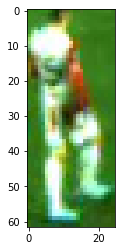

In [12]:
img = img / 255.0
plt.imshow(img)
plt.show()

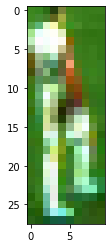

In [13]:
resized_image = cv2.resize(img, (10, 28))
plt.imshow(resized_image)
plt.show()

In [14]:
y = []
x = []

In [15]:
for file_name, label in labels:
  img = mpimg.imread(file_name)
  img = img / 255.0
  resized_image = cv2.resize(img, (10, 28))
  x.append(resized_image)
  if label == "Blue-Black Team":
    y.append([1, 0, 0])
  elif label == "Referee":
    y.append([0, 1, 0])
  elif label == "Red-White Team":
    y.append([0, 0, 1])

In [16]:
X = np.array(x)
y = np.array(y)

In [17]:
X.shape, y.shape

((1217, 28, 10, 3), (1217, 3))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,10,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

2021-07-07 15:10:28.275026: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 8, 64)         1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 4, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 2, 128)        73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               82048     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

2021-07-07 15:10:30.408601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
31/31 [==============================] - 1s 15ms/step - loss: 0.5163 - accuracy: 0.7852 - val_loss: 0.0807 - val_accuracy: 0.9959
Epoch 2/25
31/31 [==============================] - 0s 15ms/step - loss: 0.1154 - accuracy: 0.9743 - val_loss: 0.6719 - val_accuracy: 0.7131
Epoch 3/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0904 - accuracy: 0.9774 - val_loss: 0.0229 - val_accuracy: 0.9959
Epoch 4/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0679 - accuracy: 0.9866 - val_loss: 0.0137 - val_accuracy: 0.9959
Epoch 5/25
31/31 [==============================] - 0s 13ms/step - loss: 0.0552 - accuracy: 0.9877 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0577 - accuracy: 0.9887 - val_loss: 0.0098 - val_accuracy: 0.9959
Epoch 7/25
31/31 [==============================] - 0s 11ms/step - loss: 0.0476 - accuracy: 0.9918 - val_loss: 0.0074 - val_accuracy: 0.9959
Epoch 8/25
31

In [41]:
player = np.load("../p.npy")

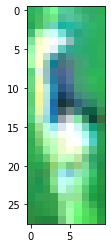

In [42]:
plt.imshow(player)
plt.show()

In [43]:
res = model.predict(player.reshape(1,28,10,3))
res.argmax(axis=1), y_test

(array([0]),
 array([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],

In [17]:
model.save("spc1.h5")
print("model saved!")

model saved!


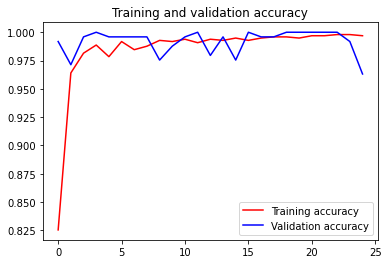

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [33]:
l2 = np.load("labels2.npy")

In [34]:
x2 = []
y2 = []

In [35]:
for file_name, label in l2:
  img = mpimg.imread(file_name)
  img = img / 255.0
  resized_image = cv2.resize(img, (10, 28))
  x2.append(resized_image)
  if label == "Blue-Black Team":
    y2.append([1, 0, 0])
  elif label == "Referee":
    y2.append([0, 1, 0])
  elif label == "Red-White Team":
    y2.append([0, 0, 1])

In [36]:
X2 = np.array(x2)
y2 = np.array(y2)

In [37]:
model.evaluate(X2, y2)

10/10 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9770


[0.12075255811214447, 0.9769737124443054]

In [31]:
ans.argmax(axis=1)

array([0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,